## Animal Behaviour Prediction

Dataset includes timestamp and accelerometer data for animal behavior prediction. This type of dataset is commonly used in various fields, such as wildlife tracking, animal behavior research, and health monitoring. Here's a breakdown of the typical features you might find in such a dataset:

1.Timestamp: This feature records the date and time when each measurement was taken. It's essential for tracking the temporal aspect of animal behavior and for organizing the data in chronological order.

2.X, Y, and Z Axes Accelerometer Data: These features represent the acceleration measurements along three different axes:

    X-Axis: Measures acceleration along the horizontal axis.
    Y-Axis: Measures acceleration along the vertical axis.
    Z-Axis: Measures acceleration along the depth or forward-backward axis.
Accelerometer data can be collected in units like meters per second squared (m/s²) or gravitational units (g-force). These measurements capture how the animal moves or changes its position in three-dimensional space over time.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv('abp_accel.csv')

In [5]:
data.head()

,timestamp,x,y,z
0,2015-06-12 13:30:00.161041,100,620,804
1,2015-06-12 13:30:00.260490,68,640,800
2,2015-06-12 13:30:00.359939,48,628,884
3,2015-06-12 13:30:00.459388,44,616,888
4,2015-06-12 13:30:00.558837,76,628,860


In [6]:
data[['x','y','z']].describe()

,x,y,z
count,1.459585e+07,1.459585e+07,1.459585e+07
mean,4.719627e+01,8.962975e+02,1.418171e+02
std,3.446561e+02,2.013185e+02,3.371740e+02
min,-1.840000e+03,-1.828000e+03,-2.040000e+03
25%,-2.400000e+02,8.400000e+02,-3.600000e+01
50%,1.640000e+02,9.720000e+02,1.040000e+02
75%,3.200000e+02,1.016000e+03,2.840000e+02
max,1.792000e+03,1.904000e+03,2.040000e+03


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14595853 entries, 0 to 14595852
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   timestamp  object
 1   x          int64 
 2   y          int64 
 3   z          int64 
dtypes: int64(3), object(1)
memory usage: 445.4+ MB


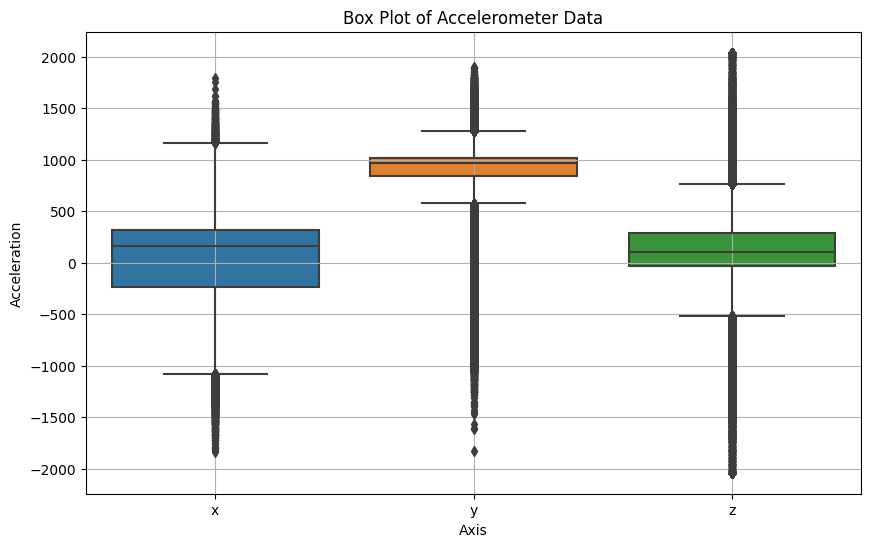

In [8]:
# Visualization: Box plot of acceleration for each axis (X, Y, Z)
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['x', 'y', 'z']])
plt.xlabel('Axis')
plt.ylabel('Acceleration')
plt.title('Box Plot of Accelerometer Data')
plt.grid(True)
plt.show()

## Box plot  provides a graphical summary of the distribution of a dataset. It displays the following key statistics for each axis (X, Y, Z):

    Box: The box represents the interquartile range (IQR), which contains the middle 50% of the data. The bottom edge of the box is the first quartile (Q1), and the top edge is the third quartile (Q3). The height of the box (Q3 - Q1) represents the IQR.

    Median (Line Inside the Box): The horizontal line inside the box represents the median (Q2), which is the middle value of the dataset when sorted.

    Whiskers: The whiskers extend from the edges of the box to the minimum and maximum values within a defined range. Any data points beyond the whiskers are considered outliers and are plotted individually as dots.

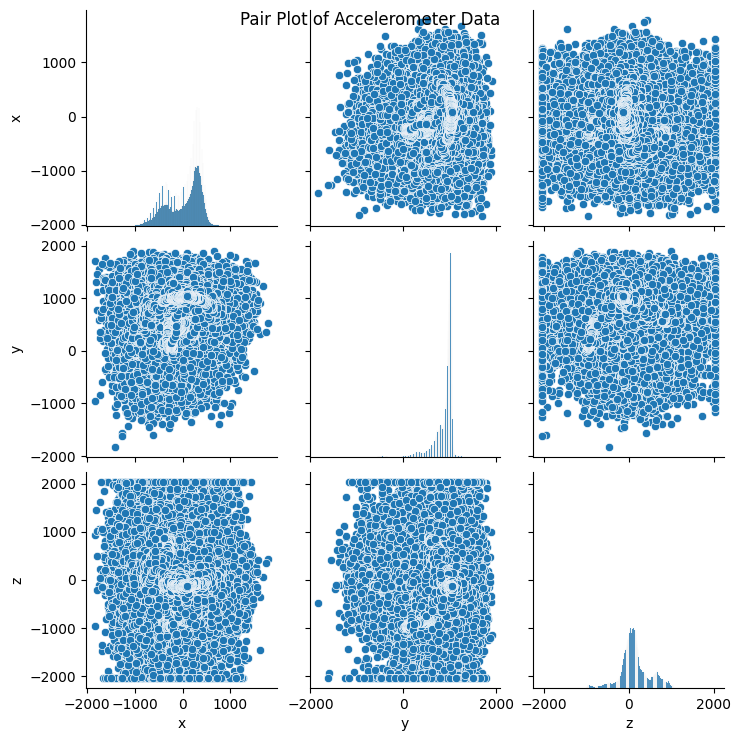

In [9]:
# Visualization: Pair plot to visualize relationships between axes
sns.pairplot(data=data[['x', 'y', 'z']])
plt.suptitle('Pair Plot of Accelerometer Data')
plt.show()

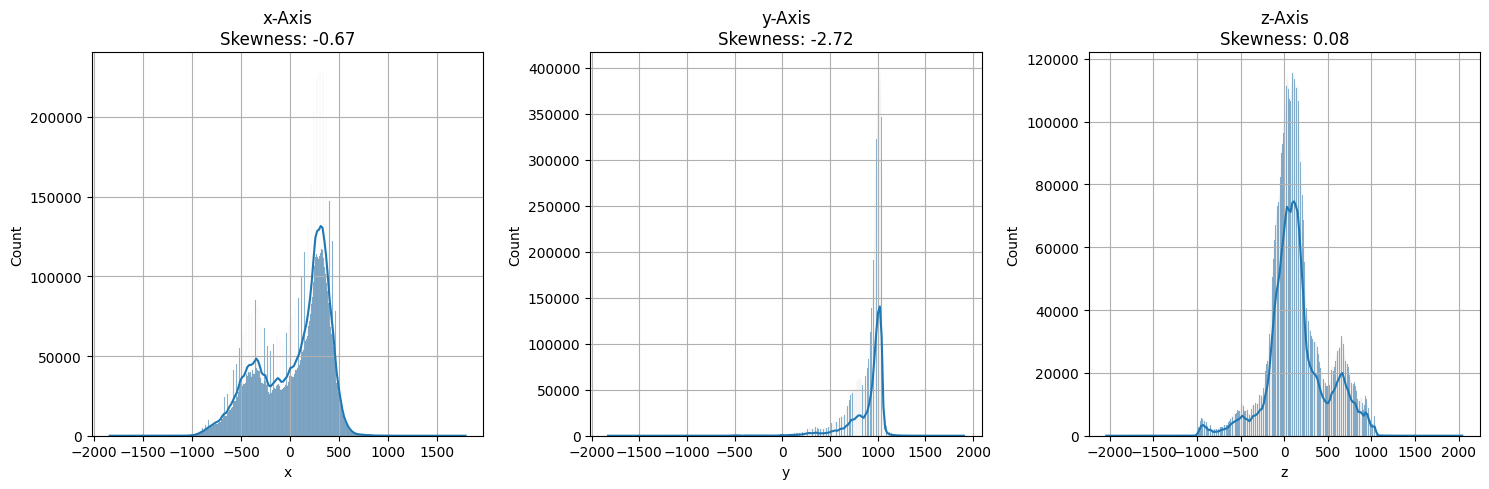

In [10]:

# Create a figure with three subplots (one for each axis)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot histograms and calculate skewness for each axis
for i, axis in enumerate(['x', 'y', 'z']):
    # Calculate skewness for the current axis
    skewness = data[axis].skew()
    
    # Create a histogram plot for the current axis
    sns.histplot(data=data, x=axis, kde=True, ax=axes[i])
    
    # Set plot title including skewness value
    axes[i].set_title(f'{axis}-Axis\nSkewness: {skewness:.2f}')
    
    # Add gridlines for better readability
    axes[i].grid(True)

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()


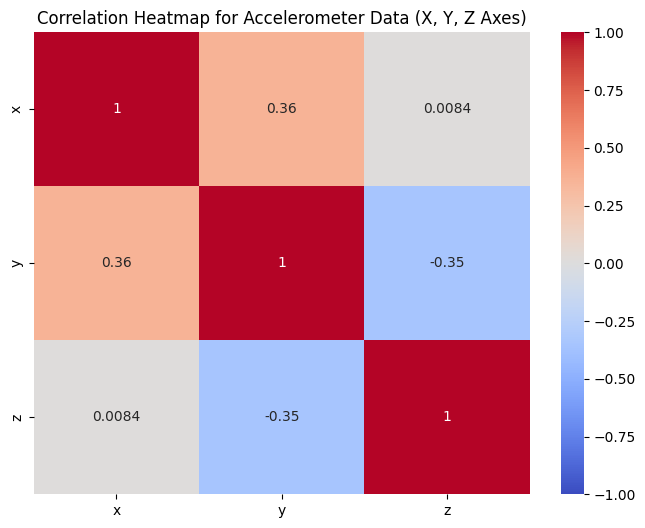

In [11]:
# Calculate the correlation matrix
correlation_matrix = data[['x', 'y', 'z']].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for Accelerometer Data (X, Y, Z Axes)')
plt.show()

In [12]:
data.describe()

,x,y,z
count,1.459585e+07,1.459585e+07,1.459585e+07
mean,4.719627e+01,8.962975e+02,1.418171e+02
std,3.446561e+02,2.013185e+02,3.371740e+02
min,-1.840000e+03,-1.828000e+03,-2.040000e+03
25%,-2.400000e+02,8.400000e+02,-3.600000e+01
50%,1.640000e+02,9.720000e+02,1.040000e+02
75%,3.200000e+02,1.016000e+03,2.840000e+02
max,1.792000e+03,1.904000e+03,2.040000e+03


### Resampling the feature timestamp

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14595853 entries, 0 to 14595852
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   timestamp  object
 1   x          int64 
 2   y          int64 
 3   z          int64 
dtypes: int64(3), object(1)
memory usage: 445.4+ MB


In [14]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
df=data
#df.set_index('timestamp',inplace=True)

# Resample the entire DataFrame
#df_resampled = df.resample('S').mean()

# Reset the index to make 'timestamp' a regular column
df.head()

,timestamp,x,y,z
0,2015-06-12 13:30:00.161041,100,620,804
1,2015-06-12 13:30:00.260490,68,640,800
2,2015-06-12 13:30:00.359939,48,628,884
3,2015-06-12 13:30:00.459388,44,616,888
4,2015-06-12 13:30:00.558837,76,628,860


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14595853 entries, 0 to 14595852
Data columns (total 4 columns):
 #   Column     Dtype         
---  ------     -----         
 0   timestamp  datetime64[ns]
 1   x          int64         
 2   y          int64         
 3   z          int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 445.4 MB


In [16]:

df.set_index('timestamp', inplace=True)

# Resample the entire DataFrame
df_resampled = df.resample('S').mean()




In [17]:
# Reset the index to make 'timestamp' a regular column
df_resampled.reset_index(inplace=True)

In [18]:
df_resampled

,timestamp,x,y,z
0,2015-06-12 13:30:00,95.555556,620.000000,847.111111
1,2015-06-12 13:30:01,164.000000,607.200000,841.200000
2,2015-06-12 13:30:02,144.400000,604.800000,846.000000
3,2015-06-12 13:30:03,70.400000,607.600000,863.600000
4,2015-06-12 13:30:04,-35.200000,587.600000,843.600000
...,...,...,...,...
1450795,2015-06-29 08:29:55,31.600000,1039.200000,-126.000000
1450796,2015-06-29 08:29:56,42.800000,1040.400000,-150.800000
1450797,2015-06-29 08:29:57,55.200000,1029.600000,-123.600000
1450798,2015-06-29 08:29:58,72.400000,1033.600000,-128.000000


### Feature Engineering

In [19]:
# To create a column rms
# Calculate squared values for x, y, and z
df_resampled['x_squared'] = df_resampled['x'] ** 2
df_resampled['y_squared'] = df_resampled['y'] ** 2
df_resampled['z_squared'] = df_resampled['z'] ** 2

# Calculate the mean of squared values
df_resampled['mean_squared'] = (df_resampled['x_squared'] + df_resampled['y_squared'] + df_resampled['z_squared']) / 3

# Calculate the RMS value by taking the square root of the mean_squared
df_resampled['rms'] = np.sqrt(df_resampled['mean_squared'])

# Now, df['rms'] contains the RMS values for each timestamp
df_resampled

,timestamp,x,y,z,x_squared,y_squared,z_squared,mean_squared,rms
0,2015-06-12 13:30:00,95.555556,620.000000,847.111111,9130.864198,3.844000e+05,717597.234568,370376.032922,608.585272
1,2015-06-12 13:30:01,164.000000,607.200000,841.200000,26896.000000,3.686918e+05,707617.440000,367735.093333,606.411653
2,2015-06-12 13:30:02,144.400000,604.800000,846.000000,20851.360000,3.657830e+05,715716.000000,367450.133333,606.176652
3,2015-06-12 13:30:03,70.400000,607.600000,863.600000,4956.160000,3.691778e+05,745804.960000,373312.960000,610.993421
4,2015-06-12 13:30:04,-35.200000,587.600000,843.600000,1239.040000,3.452738e+05,711660.960000,352724.586667,593.906210
...,...,...,...,...,...,...,...,...,...
1450795,2015-06-29 08:29:55,31.600000,1039.200000,-126.000000,998.560000,1.079937e+06,15876.000000,365603.733333,604.651745
1450796,2015-06-29 08:29:56,42.800000,1040.400000,-150.800000,1831.840000,1.082432e+06,22740.640000,369001.546667,607.454975
1450797,2015-06-29 08:29:57,55.200000,1029.600000,-123.600000,3047.040000,1.060076e+06,15276.960000,359466.720000,599.555435
1450798,2015-06-29 08:29:58,72.400000,1033.600000,-128.000000,5241.760000,1.068329e+06,16384.000000,363318.240000,602.758857


In [20]:
# To create absolute 

df_resampled['abs_rms'] =df_resampled['rms'].abs()

In [21]:
df_resampled

,timestamp,x,y,z,x_squared,y_squared,z_squared,mean_squared,rms,abs_rms
0,2015-06-12 13:30:00,95.555556,620.000000,847.111111,9130.864198,3.844000e+05,717597.234568,370376.032922,608.585272,608.585272
1,2015-06-12 13:30:01,164.000000,607.200000,841.200000,26896.000000,3.686918e+05,707617.440000,367735.093333,606.411653,606.411653
2,2015-06-12 13:30:02,144.400000,604.800000,846.000000,20851.360000,3.657830e+05,715716.000000,367450.133333,606.176652,606.176652
3,2015-06-12 13:30:03,70.400000,607.600000,863.600000,4956.160000,3.691778e+05,745804.960000,373312.960000,610.993421,610.993421
4,2015-06-12 13:30:04,-35.200000,587.600000,843.600000,1239.040000,3.452738e+05,711660.960000,352724.586667,593.906210,593.906210
...,...,...,...,...,...,...,...,...,...,...
1450795,2015-06-29 08:29:55,31.600000,1039.200000,-126.000000,998.560000,1.079937e+06,15876.000000,365603.733333,604.651745,604.651745
1450796,2015-06-29 08:29:56,42.800000,1040.400000,-150.800000,1831.840000,1.082432e+06,22740.640000,369001.546667,607.454975,607.454975
1450797,2015-06-29 08:29:57,55.200000,1029.600000,-123.600000,3047.040000,1.060076e+06,15276.960000,359466.720000,599.555435,599.555435
1450798,2015-06-29 08:29:58,72.400000,1033.600000,-128.000000,5241.760000,1.068329e+06,16384.000000,363318.240000,602.758857,602.758857


In [22]:
# remove unwanted columns
df1=df_resampled

In [23]:
df1

,timestamp,x,y,z,x_squared,y_squared,z_squared,mean_squared,rms,abs_rms
0,2015-06-12 13:30:00,95.555556,620.000000,847.111111,9130.864198,3.844000e+05,717597.234568,370376.032922,608.585272,608.585272
1,2015-06-12 13:30:01,164.000000,607.200000,841.200000,26896.000000,3.686918e+05,707617.440000,367735.093333,606.411653,606.411653
2,2015-06-12 13:30:02,144.400000,604.800000,846.000000,20851.360000,3.657830e+05,715716.000000,367450.133333,606.176652,606.176652
3,2015-06-12 13:30:03,70.400000,607.600000,863.600000,4956.160000,3.691778e+05,745804.960000,373312.960000,610.993421,610.993421
4,2015-06-12 13:30:04,-35.200000,587.600000,843.600000,1239.040000,3.452738e+05,711660.960000,352724.586667,593.906210,593.906210
...,...,...,...,...,...,...,...,...,...,...
1450795,2015-06-29 08:29:55,31.600000,1039.200000,-126.000000,998.560000,1.079937e+06,15876.000000,365603.733333,604.651745,604.651745
1450796,2015-06-29 08:29:56,42.800000,1040.400000,-150.800000,1831.840000,1.082432e+06,22740.640000,369001.546667,607.454975,607.454975
1450797,2015-06-29 08:29:57,55.200000,1029.600000,-123.600000,3047.040000,1.060076e+06,15276.960000,359466.720000,599.555435,599.555435
1450798,2015-06-29 08:29:58,72.400000,1033.600000,-128.000000,5241.760000,1.068329e+06,16384.000000,363318.240000,602.758857,602.758857


In [24]:
df1.drop(columns=['x_squared','y_squared','z_squared','mean_squared'],inplace=True)
df1

,timestamp,x,y,z,rms,abs_rms
0,2015-06-12 13:30:00,95.555556,620.000000,847.111111,608.585272,608.585272
1,2015-06-12 13:30:01,164.000000,607.200000,841.200000,606.411653,606.411653
2,2015-06-12 13:30:02,144.400000,604.800000,846.000000,606.176652,606.176652
3,2015-06-12 13:30:03,70.400000,607.600000,863.600000,610.993421,610.993421
4,2015-06-12 13:30:04,-35.200000,587.600000,843.600000,593.906210,593.906210
...,...,...,...,...,...,...
1450795,2015-06-29 08:29:55,31.600000,1039.200000,-126.000000,604.651745,604.651745
1450796,2015-06-29 08:29:56,42.800000,1040.400000,-150.800000,607.454975,607.454975
1450797,2015-06-29 08:29:57,55.200000,1029.600000,-123.600000,599.555435,599.555435
1450798,2015-06-29 08:29:58,72.400000,1033.600000,-128.000000,602.758857,602.758857


### hypothesis
Hypothesis: The activity level of animals, as measured by the accelerometer data (x, y, z), varies based on the time of day. Specifically, animals may be more active during certain periods, such as dawn and dusk.

Null Hypothesis: There is a significant difference in 'y' axis activity between daytime and nighttime.

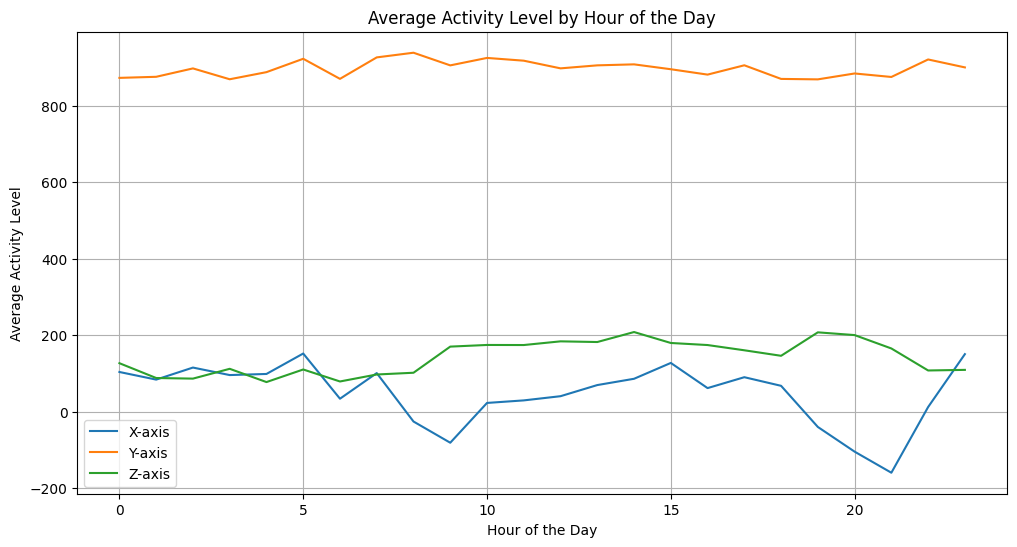

In [25]:

# Extract the hour of the day from the timestamp
df1['hour'] = df1['timestamp'].dt.hour

# Calculate the average activity levels (x, y, z) for each hour
hourly_activity = df1.groupby('hour')[['x', 'y', 'z']].mean()

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(hourly_activity.index, hourly_activity['x'], label='X-axis')
plt.plot(hourly_activity.index, hourly_activity['y'], label='Y-axis')
plt.plot(hourly_activity.index, hourly_activity['z'], label='Z-axis')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Activity Level')
plt.title('Average Activity Level by Hour of the Day')
plt.legend()
plt.grid(True)
plt.show()


In [26]:
df1['hours']=df1['timestamp'].dt.hour

In [27]:
df1.drop(columns=['hours'],inplace=True)

In [28]:
df1

,timestamp,x,y,z,rms,abs_rms,hour
0,2015-06-12 13:30:00,95.555556,620.000000,847.111111,608.585272,608.585272,13
1,2015-06-12 13:30:01,164.000000,607.200000,841.200000,606.411653,606.411653,13
2,2015-06-12 13:30:02,144.400000,604.800000,846.000000,606.176652,606.176652,13
3,2015-06-12 13:30:03,70.400000,607.600000,863.600000,610.993421,610.993421,13
4,2015-06-12 13:30:04,-35.200000,587.600000,843.600000,593.906210,593.906210,13
...,...,...,...,...,...,...,...
1450795,2015-06-29 08:29:55,31.600000,1039.200000,-126.000000,604.651745,604.651745,8
1450796,2015-06-29 08:29:56,42.800000,1040.400000,-150.800000,607.454975,607.454975,8
1450797,2015-06-29 08:29:57,55.200000,1029.600000,-123.600000,599.555435,599.555435,8
1450798,2015-06-29 08:29:58,72.400000,1033.600000,-128.000000,602.758857,602.758857,8


In [29]:
import scipy.stats as stats

# Separate the data into daytime and nighttime observations
daytime_data = df1[df1['hour'].between(6, 18)]  # Assuming daytime is from 6 AM to 6 PM
nighttime_data = df1[~df1['hour'].between(6, 18)]  # Nighttime is from 6 PM to 6 AM

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(daytime_data['y'], nighttime_data['y'])

# Define the significance level (alpha)
alpha = 0.05

# Check the p-value against the significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in 'y' axis activity between daytime and nighttime.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in 'y' axis activity between daytime and nighttime.")


Reject the null hypothesis: There is a significant difference in 'y' axis activity between daytime and nighttime.


High variation in the accelerometer's Y-axis values when monitoring animal behavior can be attributed to several factors. Accelerometers are commonly used to measure changes in acceleration or movement, and these variations could reflect different aspects of animal behavior or environmental conditions. Here are some potential reasons for high Y-axis variation:

Natural Behavior: Some animals naturally exhibit high variation in their movement patterns. For example, animals like birds or small mammals may exhibit erratic movements during foraging, mating, or predator evasion.

Environmental Factors: Changes in the animal's environment can lead to variations in their behavior. Factors such as temperature, humidity, light, and noise can influence an animal's activity levels and movement.

Social Interactions: If the animals are social or live in groups, interactions with conspecifics or other animals can lead to variations in movement patterns. For instance, play behavior, aggression, or mating behaviors can result in sudden changes in acceleration.

Stress or Fear: Animals can experience stress or fear in response to various stimuli, such as the presence of predators, humans, or unfamiliar objects. This can lead to rapid and irregular movements captured by the accelerometer.

Health Issues: Animals that are unwell or experiencing discomfort may exhibit irregular movement patterns, which can be detected by changes in accelerometer data.

Sensor Placement: The placement of the accelerometer on the animal's body can affect the data. If it's not securely attached or if it's placed in a location where it's easily jostled, this can lead to variations.

Data Noise: Sometimes, variations may be due to noise in the accelerometer data itself. Instrumentation issues, electrical interference, or sensor calibration problems can introduce variability.

Sampling Frequency: The rate at which data is collected can impact the perceived variation. Higher sampling frequencies capture finer details of movement but can result in more apparent variation.

Biological Factors: Different species or individuals within a species may exhibit varying levels of activity or behavior, leading to differences in accelerometer data.

Data Analysis Techniques: The way data is processed and analyzed can also impact the perception of variation. Different filtering or smoothing methods may yield different results.

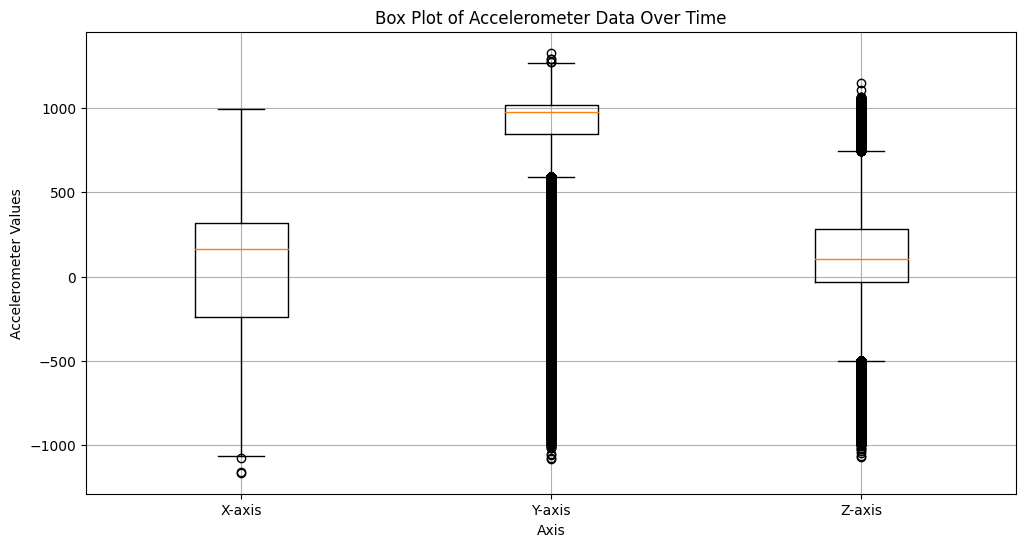

In [30]:
plt.figure(figsize=(12, 6))
plt.boxplot([df1['x'], df1['y'], df1['z']], labels=['X-axis', 'Y-axis', 'Z-axis'])
plt.xlabel('Axis')
plt.ylabel('Accelerometer Values')
plt.title('Box Plot of Accelerometer Data Over Time')
plt.grid(True)
plt.show()


## Implement Clustering KMeans

Now, we can visually inspect the elbow curve to determine the optimal number of clusters (K). The "elbow point" in the curve is where the distortion starts to level off. You can choose K at or near that point. Here its k=4

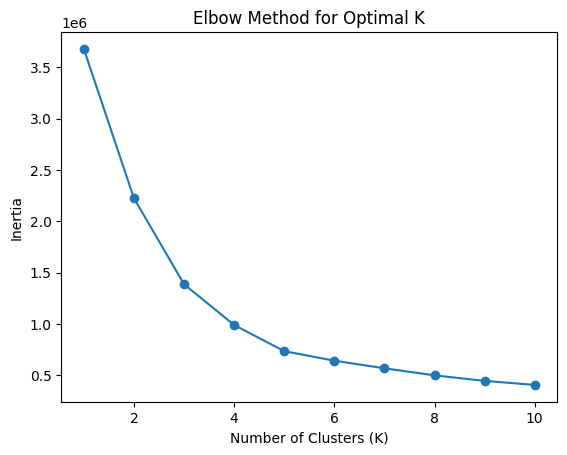

array([[ 1.95279963,  1.41621836],
       [ 1.88689713,  1.52881161],
       [ 1.93150196,  1.50582457],
       ...,
       [-0.94077705, -0.28069271],
       [-0.98681593, -0.26198559],
       [-1.01989739, -0.24977539]])

In [32]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select the relevant columns for PCA and clustering
selected_columns = ['x', 'y', 'z', 'hour']
data_points = df1[selected_columns]

# Scale the data using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_points)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)  # Reduce to 2 principal components (you can adjust this)
pca_data = pca.fit_transform(scaled_data)

# Determine the optimal number of clusters (e.g., using the elbow method)
inertia_values = []
for k in range(1, 11):  # You can adjust the range as needed
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(pca_data)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve to find the optimal number of clusters
plt.plot(range(1, 11), inertia_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# Choose the optimal number of clusters (e.g., based on the elbow curve)
optimal_k = 4  # Adjust based on your analysis

# Apply K-Means clustering to the reduced data
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
kmeans.fit(pca_data)

# Add cluster labels to your original DataFrame
pca_data




In [33]:
cluster_labels = kmeans.predict(pca_data)
pca_df = pd.DataFrame(data=pca_data, columns=['PCA1', 'PCA2'])
pca_df['cluster'] = kmeans.labels_
cluster_medians = pca_df.groupby('cluster').median()[['PCA1', 'PCA2']]

median_based_labels = {
    cluster: f'Median Cluster {i}' for i, cluster in enumerate(cluster_medians.index)
}

# Apply the median-based labels to the clusters
pca_df['median_cluster_label'] = pca_df['cluster'].map(median_based_labels)
pca_df

,PCA1,PCA2,cluster,median_cluster_label
0,1.952800,1.416218,2,Median Cluster 2
1,1.886897,1.528812,2,Median Cluster 2
2,1.931502,1.505825,2,Median Cluster 2
3,2.057671,1.411050,2,Median Cluster 2
4,2.255957,1.207886,0,Median Cluster 0
...,...,...,...,...
1450795,-0.942650,-0.330673,1,Median Cluster 1
1450796,-0.999644,-0.357600,1,Median Cluster 1
1450797,-0.940777,-0.280693,1,Median Cluster 1
1450798,-0.986816,-0.261986,1,Median Cluster 1


             PCA1      PCA2  cluster median_cluster_label  behavior
2465     0.341759  0.238409        1     Median Cluster 1  standing
2466     0.322087  0.226060        1     Median Cluster 1  standing
2467     0.325864  0.231848        1     Median Cluster 1  standing
7886    -0.240226  0.549545        1     Median Cluster 1  standing
7887    -0.400947  0.433547        1     Median Cluster 1  standing
...           ...       ...      ...                  ...       ...
1450795 -0.942650 -0.330673        1     Median Cluster 1  standing
1450796 -0.999644 -0.357600        1     Median Cluster 1  standing
1450797 -0.940777 -0.280693        1     Median Cluster 1  standing
1450798 -0.986816 -0.261986        1     Median Cluster 1  standing
1450799 -1.019897 -0.249775        1     Median Cluster 1  standing

[787082 rows x 5 columns]


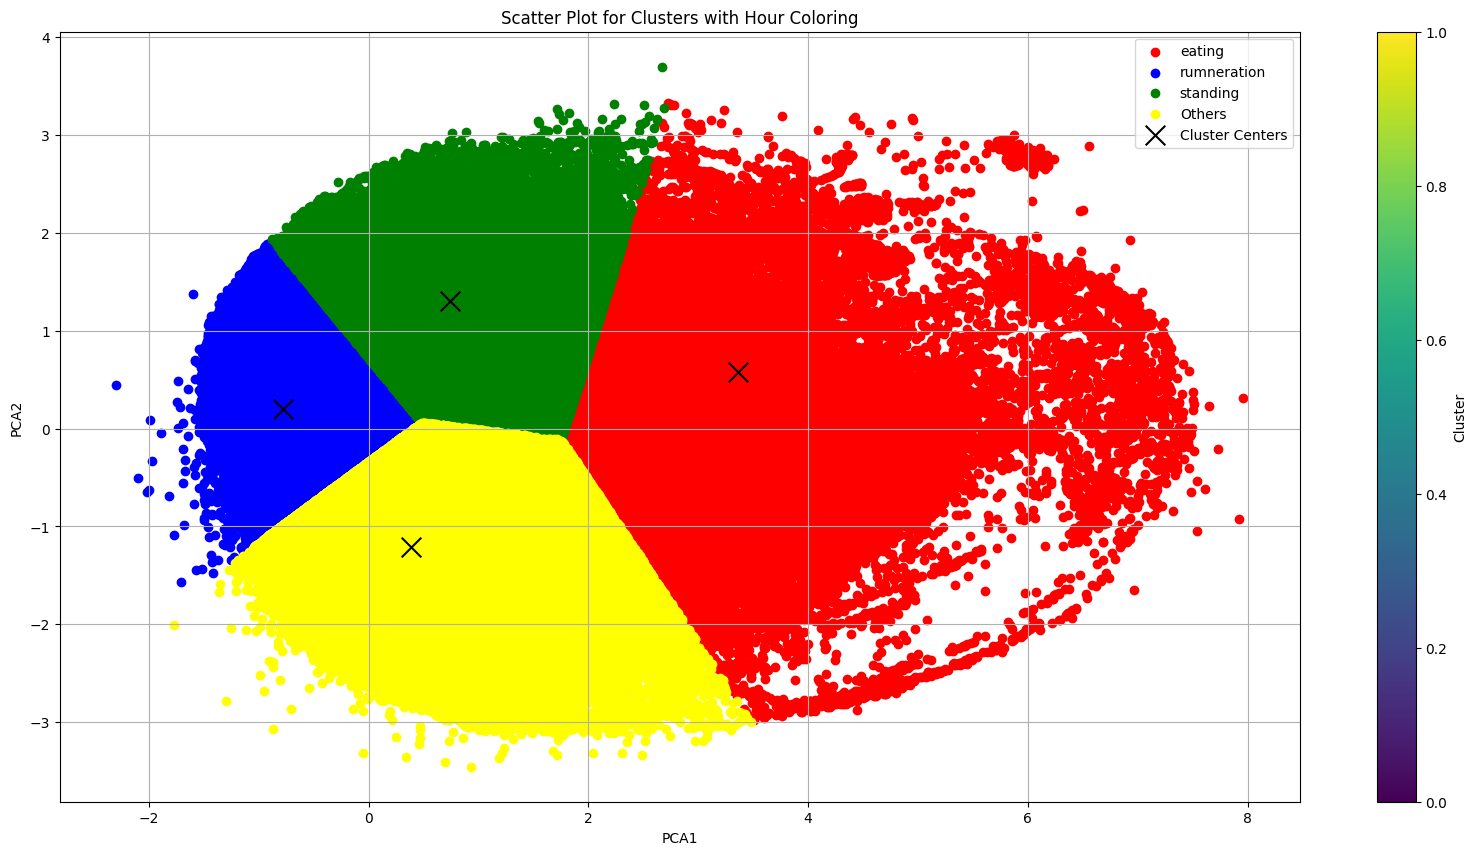

In [36]:
cluster_to_behavior = {
    0: 'eating',
    1: 'standing',
    2: 'rumneration',
    3: 'others'
}
pca_df['behavior'] = pca_df['cluster'].map(cluster_to_behavior)
d1=pca_df[pca_df.cluster==0]
d2=pca_df[pca_df.cluster==1]
d3=pca_df[pca_df.cluster==2]
d4=pca_df[pca_df.cluster==3]

plt.figure(figsize=(20, 10))
print(d2)

# Scatter plot for cluster 0 (assuming 'hour' is used for color)
plt.scatter(d1.PCA1, d1.PCA2, c='red', cmap='viridis', label='eating')

# Scatter plot for cluster 1
plt.scatter(d2.PCA1, d2.PCA2, c='blue', cmap='viridis', label='rumneration')

# Scatter plot for cluster 2
plt.scatter(d3.PCA1, d3.PCA2, c='green', cmap='viridis', label='standing')

# Scatter plot for cluster 3
plt.scatter(d4.PCA1, d4.PCA2, c='yellow', cmap='viridis', label='Others')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', label='Cluster Centers', marker='x')

plt.title('Scatter Plot for Clusters with Hour Coloring')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450800 entries, 0 to 1450799
Data columns (total 7 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   timestamp  1450800 non-null  datetime64[ns]
 1   x          1450800 non-null  float64       
 2   y          1450800 non-null  float64       
 3   z          1450800 non-null  float64       
 4   rms        1450800 non-null  float64       
 5   abs_rms    1450800 non-null  float64       
 6   hour       1450800 non-null  int32         
dtypes: datetime64[ns](1), float64(5), int32(1)
memory usage: 71.9 MB


## Model Implementation

Classify the data and predict in which cluster each data point falls using different classification algorithm

In [35]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [36]:
X = pca_df[['PCA1','PCA2']]
y = pca_df['cluster']


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=50000,train_size=50000 ,random_state=42)
X_train

,PCA1,PCA2
313383,-0.349835,-1.087681
932599,-0.592222,-0.473214
377558,2.027417,-1.411748
908192,-0.040976,0.403801
492540,-0.866061,1.053158
...,...,...
146502,0.295941,1.745536
604015,-0.631560,0.206177
347577,-0.538801,0.571578
1199133,-0.965552,0.241214


In [38]:
classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier()
}

for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f"Classifier: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Classification Report:\n{report}\n")


Classifier: Decision Tree
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3327
           1       1.00      1.00      1.00     27245
           2       0.99      0.99      0.99      6278
           3       1.00      1.00      1.00     13150

    accuracy                           1.00     50000
   macro avg       1.00      0.99      1.00     50000
weighted avg       1.00      1.00      1.00     50000


Classifier: K-Nearest Neighbors
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3327
           1       1.00      1.00      1.00     27245
           2       1.00      0.99      0.99      6278
           3       1.00      1.00      1.00     13150

    accuracy                           1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50

All the classifier algorithm implemented has got the accuracy as 100%, I suspect overfitting of data. To check and verify, im going to perform hyper parameter tunning

## Hyperparameter Tuning

In [39]:
import pandas as pd
from sklearn.model_selection import GridSearchCV



# Define a dictionary of classifiers and their hyperparameters
classifiers = {
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 10, 20, 30]
        }
    },
    'K-Nearest Neighbors': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance']
        }
    },
    'Logistic Regression': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.1, 1, 10],
            'penalty': ['l1', 'l2']
        }
    },
    'Support Vector Machine': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20, 30]
        }
    }
}

# Perform hyperparameter tuning and evaluate each classifier
for name, classifier in classifiers.items():
    clf = classifier['model']
    param_grid = classifier['params']
    
    grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    
    y_pred = best_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f"Classifier: {name}")
    print(f"Best Hyperparameters: {best_params}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Classification Report:\n{report}\n")


Classifier: Decision Tree
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None}
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3327
           1       1.00      1.00      1.00     27245
           2       0.99      0.99      0.99      6278
           3       0.99      0.99      0.99     13150

    accuracy                           1.00     50000
   macro avg       0.99      0.99      0.99     50000
weighted avg       1.00      1.00      1.00     50000


Classifier: K-Nearest Neighbors
Best Hyperparameters: {'n_neighbors': 7, 'weights': 'distance'}
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3327
           1       1.00      1.00      1.00     27245
           2       1.00      0.99      1.00      6278
           3       1.00      1.00      1.00     13150

    accuracy                

In [40]:
df1.head()

,timestamp,x,y,z,rms,abs_rms,hour
0,2015-06-12 13:30:00,95.555556,620.0,847.111111,608.585272,608.585272,13
1,2015-06-12 13:30:01,164.000000,607.2,841.200000,606.411653,606.411653,13
2,2015-06-12 13:30:02,144.400000,604.8,846.000000,606.176652,606.176652,13
3,2015-06-12 13:30:03,70.400000,607.6,863.600000,610.993421,610.993421,13
4,2015-06-12 13:30:04,-35.200000,587.6,843.600000,593.906210,593.906210,13


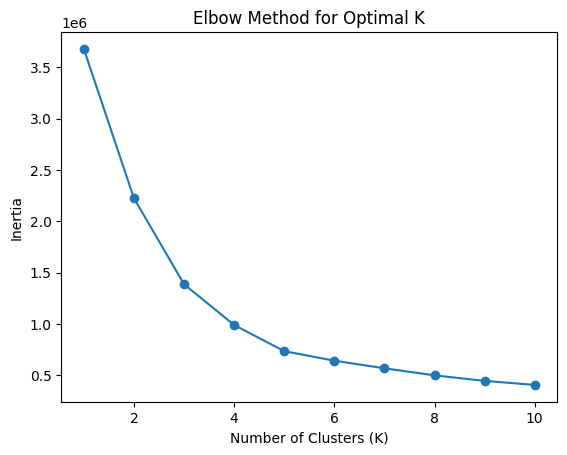

In [41]:

new_pca=pca_df[['PCA1','PCA2']]

# Determine the optimal number of clusters (e.g., using the elbow method)
inertia_values = []
for k in range(1, 11):  # You can adjust the range as needed
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(new_pca)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve to find the optimal number of clusters
plt.plot(range(1, 11), inertia_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# Choose the optimal number of clusters (e.g., based on the elbow curve)



In [42]:
optimal_k = 4  # Adjust based on your analysis

# Apply K-Means clustering to the reduced data
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
kmeans.fit(new_pca)

# Add cluster labels to your original DataFrame
df1['cluster'] = kmeans.labels_

# Print or visualize the results as needed
print(df1[['x', 'y', 'z', 'hour', 'rms', 'abs_rms', 'cluster']])

                  x            y           z  hour         rms     abs_rms   
0         95.555556   620.000000  847.111111    13  608.585272  608.585272  \
1        164.000000   607.200000  841.200000    13  606.411653  606.411653   
2        144.400000   604.800000  846.000000    13  606.176652  606.176652   
3         70.400000   607.600000  863.600000    13  610.993421  610.993421   
4        -35.200000   587.600000  843.600000    13  593.906210  593.906210   
...             ...          ...         ...   ...         ...         ...   
1450795   31.600000  1039.200000 -126.000000     8  604.651745  604.651745   
1450796   42.800000  1040.400000 -150.800000     8  607.454975  607.454975   
1450797   55.200000  1029.600000 -123.600000     8  599.555435  599.555435   
1450798   72.400000  1033.600000 -128.000000     8  602.758857  602.758857   
1450799   84.444444  1036.444444 -131.555556     8  605.159708  605.159708   

         cluster  
0              2  
1              2  
2     

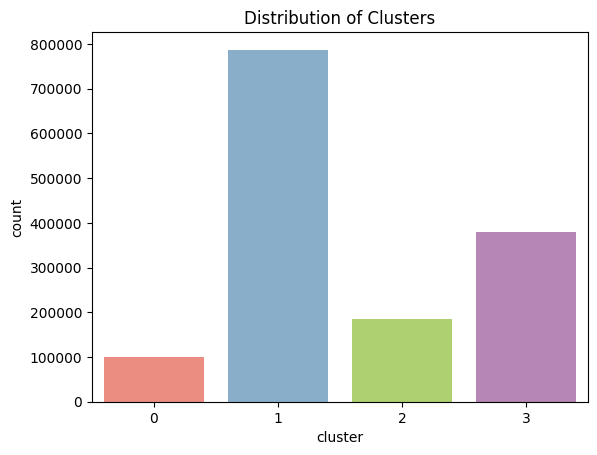

In [43]:
pl=sns.countplot(x=df1['cluster'],palette=["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe"])
pl.set_title('Distribution of Clusters')
plt.show()

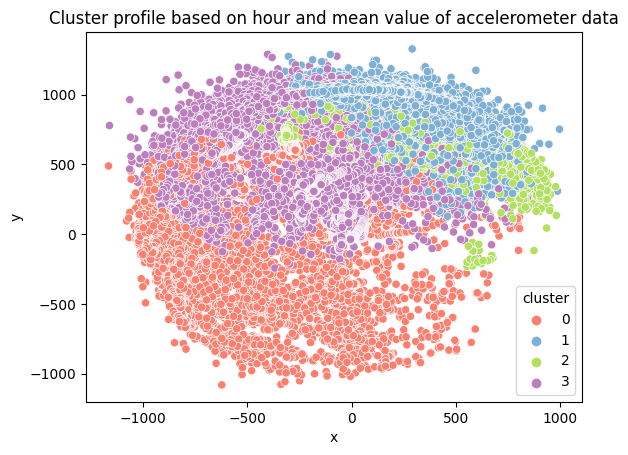

In [44]:
p1=sns.scatterplot(data=df1,x=df1['x'],y=df1['y'],hue=df1['cluster'],palette=['#fd7f6f', '#7eb0d5', '#b2e061','#bd7ebe'])
p1.set_title('Cluster profile based on hour and mean value of accelerometer data')

plt.show()

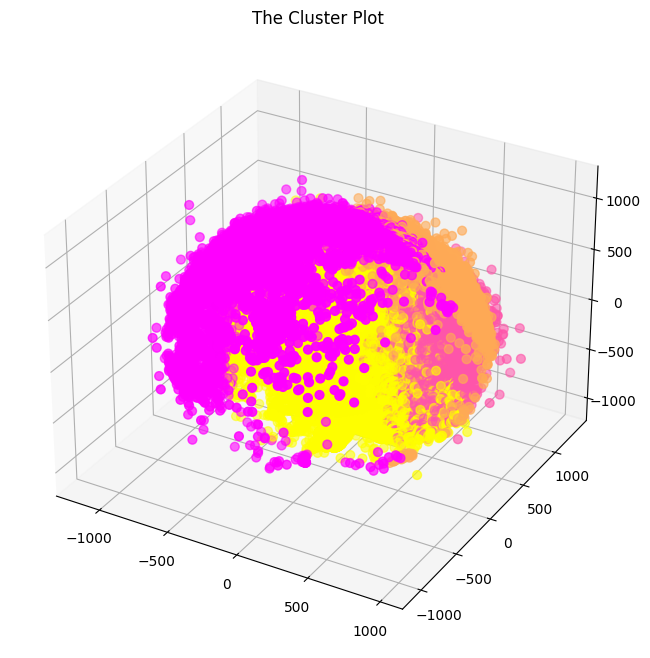

In [45]:
fig=plt.figure(figsize=(10,8))
x=df1['x']
y=df1['y']
z=df1['z']
ax=plt.subplot(111,projection='3d',label='bla')
ax.scatter(x,y,z,s=40,c=df1['cluster'],marker='o',cmap='spring')
ax.set_title('The Cluster Plot')
plt.show()

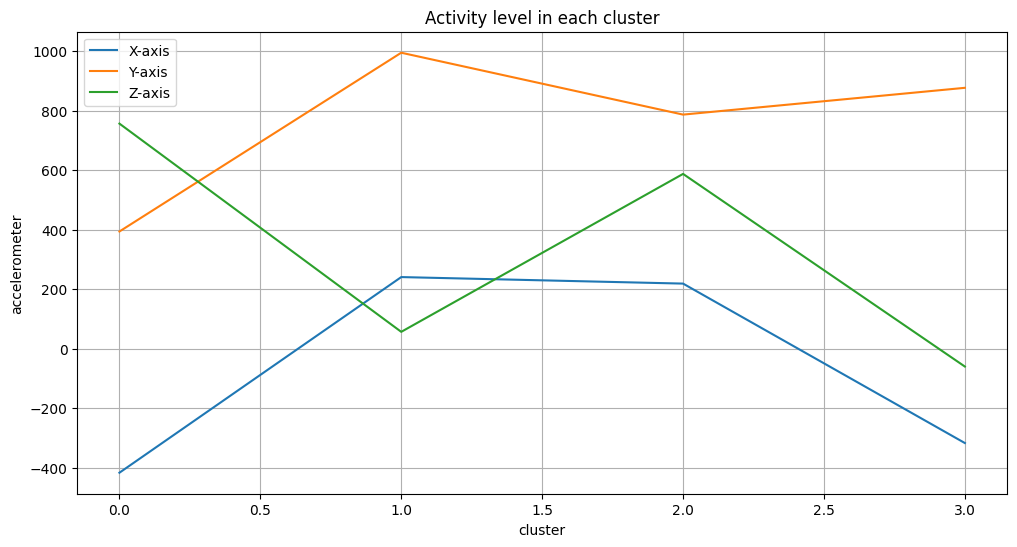

In [46]:
activity = df1.groupby('cluster')[['x', 'y', 'z']].mean()

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(activity.index, activity['x'], label='X-axis')
plt.plot(activity.index, activity['y'], label='Y-axis')
plt.plot(activity.index, activity['z'], label='Z-axis')
plt.xlabel('cluster')
plt.ylabel('accelerometer')
plt.title('Activity level in each cluster')
plt.legend()
plt.grid(True)
plt.show()

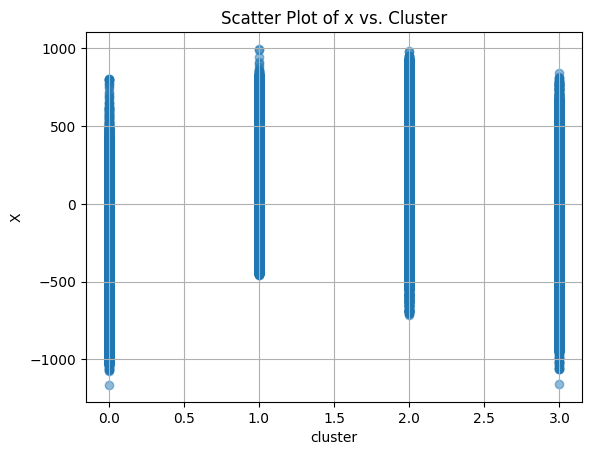

In [49]:

# Extract 'x' feature and 'cluster' target variable
x_values = df1['x']
cluster_values = df1['cluster']

# Create a scatter plot
plt.scatter( cluster_values,x_values, alpha=0.5)
plt.title('Scatter Plot of x vs. Cluster')
plt.xlabel('cluster')
plt.ylabel('X')
plt.grid(True)

# Show the plot
plt.show()


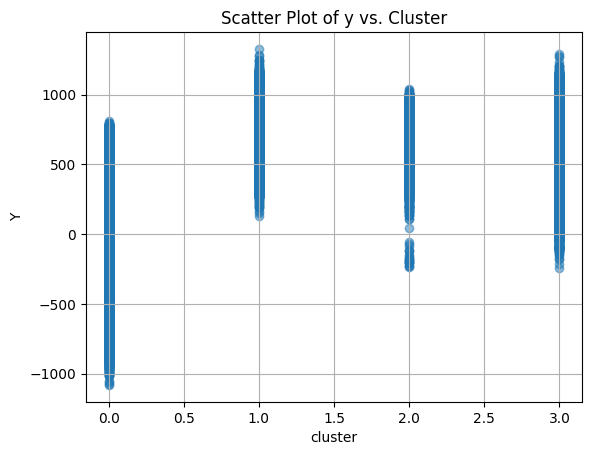

In [50]:

# Extract 'x' feature and 'cluster' target variable
y_values = df1['y']
cluster_values = df1['cluster']

# Create a scatter plot
plt.scatter( cluster_values,y_values, alpha=0.5)
plt.title('Scatter Plot of y vs. Cluster')
plt.xlabel('cluster')
plt.ylabel('Y')
plt.grid(True)

# Show the plot
plt.show()

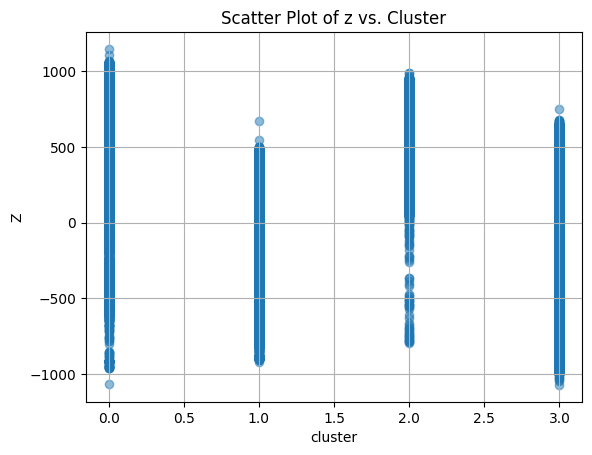

In [51]:

# Extract 'x' feature and 'cluster' target variable
x_values = df1['z']
cluster_values = df1['cluster']

# Create a scatter plot
plt.scatter( cluster_values,x_values, alpha=0.5)
plt.title('Scatter Plot of z vs. Cluster')
plt.xlabel('cluster')
plt.ylabel('Z')
plt.grid(True)

# Show the plot
plt.show()

In [52]:
df1[['z','y']].corr()

,z,y
z,1.000000,-0.354788
y,-0.354788,1.000000


In [53]:
X1 = df1[['x','y','z','hour']]
y1 = df1['cluster']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=50000,train_size=50000 ,random_state=42)
X_train

,x,y,z,hour
313383,1.600000,561.600000,-837.200000,4
932599,-122.800000,1030.800000,-63.600000,8
377558,-601.200000,749.200000,360.800000,22
908192,-236.000000,995.200000,218.000000,1
492540,417.600000,962.000000,166.400000,6
...,...,...,...,...
146502,345.600000,828.400000,570.000000,6
604015,248.727273,1010.909091,167.636364,13
347577,414.400000,948.400000,236.000000,14
1199133,288.000000,1011.600000,24.800000,10


In [55]:
classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier()
}

for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f"Classifier: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Classification Report:\n{report}\n")

Classifier: Decision Tree
Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3327
           1       0.99      0.99      0.99     27245
           2       0.98      0.98      0.98      6278
           3       0.98      0.98      0.98     13150

    accuracy                           0.99     50000
   macro avg       0.98      0.98      0.98     50000
weighted avg       0.99      0.99      0.99     50000


Classifier: K-Nearest Neighbors
Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      3327
           1       0.95      0.97      0.96     27245
           2       0.95      0.95      0.95      6278
           3       0.93      0.90      0.91     13150

    accuracy                           0.95     50000
   macro avg       0.95      0.95      0.95     50000
weighted avg       0.95      0.95      0.95     50

In [56]:
# Define a dictionary of classifiers and their hyperparameters
classifiers = {
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 10, 20, 30]
        }
    },
    'K-Nearest Neighbors': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance']
        }
    },
    'Logistic Regression': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.1, 1, 10],
            'penalty': ['l1', 'l2']
        }
    },
    'Support Vector Machine': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20, 30]
        }
    }
}

# Perform hyperparameter tuning and evaluate each classifier
for name, classifier in classifiers.items():
    clf = classifier['model']
    param_grid = classifier['params']
    
    grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    
    y_pred = best_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f"Classifier: {name}")
    print(f"Best Hyperparameters: {best_params}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Classification Report:\n{report}\n")

Classifier: Decision Tree
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 30}
Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3327
           1       0.99      0.99      0.99     27245
           2       0.98      0.97      0.98      6278
           3       0.98      0.98      0.98     13150

    accuracy                           0.99     50000
   macro avg       0.98      0.98      0.98     50000
weighted avg       0.99      0.99      0.99     50000


Classifier: K-Nearest Neighbors
Best Hyperparameters: {'n_neighbors': 3, 'weights': 'distance'}
Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3327
           1       0.96      0.97      0.96     27245
           2       0.96      0.95      0.95      6278
           3       0.93      0.91      0.92     13150

    accuracy                  

Considering the evaluation measures.

Concluding the algorith Logistic Regression as efficient machine learning model